In [1]:
from qiskit import *
from qiskit.visualization import *
import numpy as np
from qiskit.tools.monitor import *
from qiskit.quantum_info import *
from qiskit.extensions import *
from qiskit_experiments.framework import *
from qiskit_experiments.library import *
from qiskit.test.mock import *
from qiskit.providers.aer import *

In [2]:
def create_circuit(qc, sent, measure = True):
    qc.append(sent, [0])
    if measure:
        qc.measure(0, 0)
    qc.barrier()
    qc.h(1)
    qc.cx(1, 2)
    qc.barrier()
    qc.cx(0, 1)
    qc.h(0)
    qc.barrier()
    qc.cx(1, 2)
    qc.cz(0, 2)
    if measure:
        qc.measure(2, 1)

In [3]:
 sent = Initialize([1, 0])
#try a simpler state

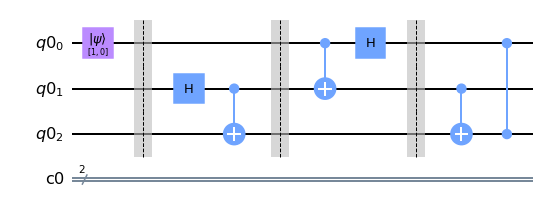

In [4]:
#simulation circuit
qc_1 = QuantumCircuit(QuantumRegister(3), ClassicalRegister(2))
create_circuit(qc_1, sent, False)
qc_1.draw()

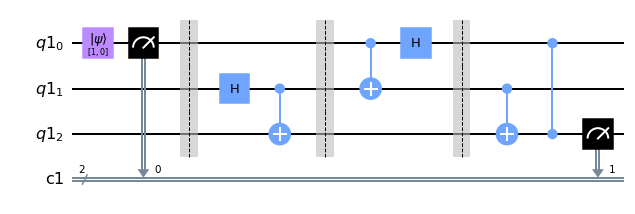

In [5]:
#real backend circuit
qc_2 = QuantumCircuit(QuantumRegister(3), ClassicalRegister(2))
create_circuit(qc_2, sent, True)
qc_2.draw()

In [6]:
#initializing providers
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_quito')
simulator = Aer.get_backend('qasm_simulator')
quito_sim = quito_sim = AerSimulator.from_backend(FakeQuito())

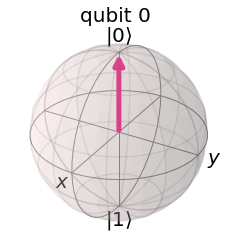

In [7]:
plot_bloch_multivector(sent)

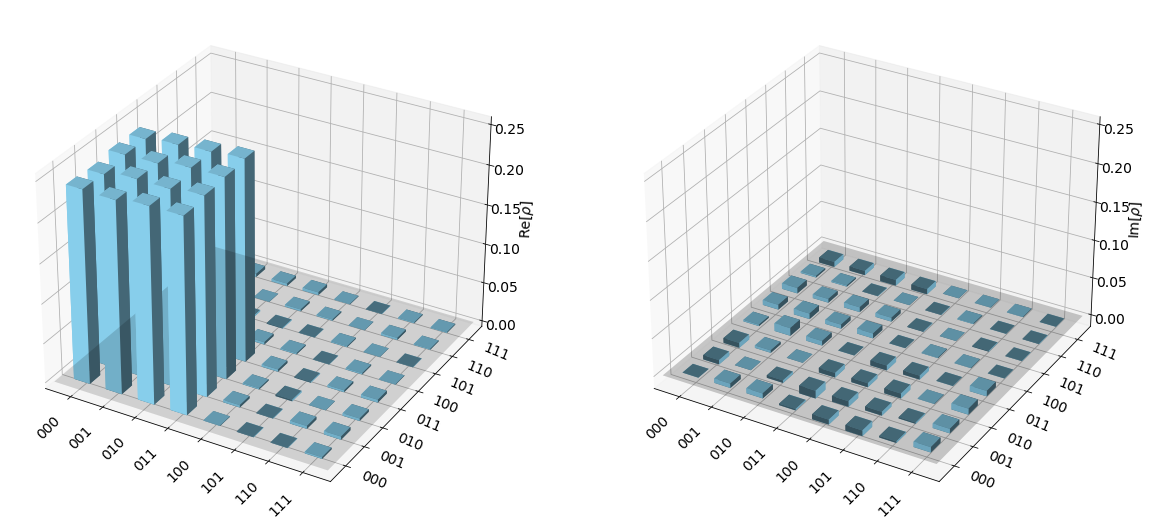

In [8]:
#perfect simulation
exp_1 = StateTomography(qc_2)
data_1 = exp_1.run(simulator, seed_simulation=1024).block_for_results()
state_analysis_1 = data_1.analysis_results("state").value
plot_state_city(state_analysis_1, figsize = [20, 10], color = ['skyblue', 'skyblue'])

In [9]:
#noisy simulation
exp_3 = StateTomography(qc_2)
data_3 = exp_3.run(quito_sim, seed_simulation = 1024).block_for_results()
state_analysis_3 = data_3.analysis_results("state").value
plot_state_city(state_analysis_3, figsize = [20, 10], color = ['skyblue', 'skyblue'])

KeyboardInterrupt: 

In [ ]:
#real backend
exp_2 = StateTomography(qc_2)
data_2 = exp_2.run(backend, seed_simulation = 1024).block_for_results()
state_analysis_2 = data_2.analysis_results("state").value
plot_state_city(state_analysis_2, figsize = [20, 10], color = ['skyblue', 'skyblue'])

In [ ]:
exp_1.analysis.set_options(fitter='cvxpy_gaussian_lstsq')
data2 = exp_1.run(simulator, seed_simulation=1024).block_for_results()
state_analysis2 = data2.analysis_results("state")
'''
print(state_analysis2)
print("\n")
for key, val in state_analysis2.extra.items():
    print(f"- {key}: {val}")
'''

In [ ]:
plot_bloch_multivector(state_analysis_1)

In [ ]:
plot_bloch_multivector(state_analysis_2)

In [ ]:
plot_bloch_multivector(state_analysis_3)